# To Check Fraud Detection of bank Credit Card 

## Feature Details

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight 

months, 9=payment delay for nine months and above)

PAY_2: Repayment status 

PAY_3: Repayment status  

PAY_4: Repayment status

PAY_5: Repayment status

PAY_6: Repayment status

BILL_AMT1: Amount of bill statement(NT dollar)

BILL_AMT2: Amount of bill statement(NT dollar)

BILL_AMT3: Amount of bill statement(NT dollar)

BILL_AMT4: Amount of bill statement(NT dollar)

BILL_AMT5: Amount of bill statement(NT dollar)

BILL_AMT6: Amount of bill statement(NT dollar)

PAY_AMT1: Amount of previous payment(NT dollar)

PAY_AMT2: Amount of previous payment(NT dollar)

PAY_AMT3: Amount of previous payment(NT dollar)

PAY_AMT4: Amount of previous payment(NT dollar)

PAY_AMT5: Amount of previous payment(NT dollar)

PAY_AMT6: Amount of previous payment(NT dollar)

default.payment.next.month: Default payment for next month (1=yes, 0=no)

###  Importing Libraries

In [3]:
#importig numpy and pandas
import numpy as np
import pandas as pd

In [10]:
#importing csv data 
data = pd.read_csv("C:\\Users\\abhishek\\Desktop\\Project\\Project 2\\credit-card-clients.csv")

In [11]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
#cheacking shape of the data
data.shape

(30000, 25)

In [13]:
# checking for null values
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [15]:
#slicing
data = data.iloc[:,1:]

In [16]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [21]:
y = data.iloc[:,-1]
X = data.iloc[:,:-2]

In [22]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [23]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,1,24,2,2,-1,-1,-2,...,3102,689,0,0,0,0,689,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,90000,2,2,2,34,0,0,0,0,0,...,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,50000,2,2,1,37,0,0,0,0,0,...,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,50000,1,2,1,57,-1,0,-1,0,0,...,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [24]:
# training and testing
from sklearn.model_selection import train_test_split

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=900)

In [134]:
#feature engineering
from sklearn.linear_model import LogisticRegression

In [135]:
#assigning model
model = LogisticRegression()

In [136]:
# fitting X_train and y_train in our model
model.fit(X_train,y_train)

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [137]:
#predictive analysis
predict_lr = model.predict(X_test)

In [138]:
predict_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [139]:
y_test.head(10)

5577     0
19190    0
18049    0
3730     0
4470     0
5110     0
27884    0
9193     0
18844    1
4072     0
Name: default payment next month, dtype: int64

In [151]:
#importing accuracy score from metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [141]:
accuracy_score(y_test,predict_lr)

0.782

In [142]:
# importing libraries of data visualization
import matplotlib.pyplot as plt
import seaborn as sb

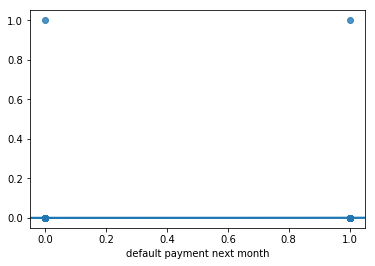

In [144]:
# visualizing data using seaborn
sb.regplot(y_test,predict_lr, logistic=True)

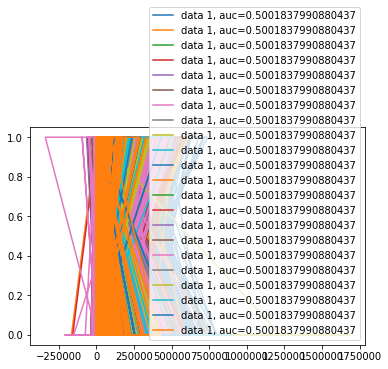

In [154]:
#y_pred_proba = model.predict_lr(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, predict_lr)
auc = roc_auc_score(y_test, predict_lr)
plt.plot(X,y,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

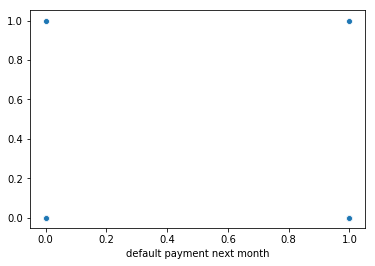

In [155]:
sb.scatterplot(y_test, predict_lr)